Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC3641 - Aprendizaje Automático Basado en Grafos <br>
Segundo Semestre 2025<br>


<h1><center> Tarea 2  </center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 3 de octubre


---

## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- Cualquier instancia de copia resultará en un 1.1 como nota de curso.

---

# Integrantes del grupo

* Estudiante 1: Vittorio Salvatore
* Estudiante 2: Felipe Vidal

# Librerías parte 1

In [ ]:
from IPython.display import clear_output

In [ ]:
!nvidia-smi
!python -V
!pip -q uninstall -y torch torchvision torchaudio torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric pyg-lib 2>/dev/null


Sat Sep 27 00:31:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip -q install torch==2.4.1+cu121 torchvision==0.19.1+cu121 torchaudio==2.4.1+cu121 --index-url https://download.pytorch.org/whl/cu121

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.9/798.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 121.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 111.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 129.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 906.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip -q install torch_geometric
!pip -q install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu121.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.6/989.6 kB 48.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import torch

# Parte 1: Node2Vec (20 puntos)

En esta sección se debe trabajar con el dataset **PubMed**.

Este conjunto de datos está disponibles en pytorch-geometric. Ver enlace: https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.Planetoid.html#torch_geometric.datasets.Planetoid

A continuación, se presenta el código para cargar el dataset.

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00


In [ ]:
from torch_geometric.datasets import Planetoid

In [ ]:
dataset = Planetoid('./data/PubMed', 'PubMed') #definir root y el dataset que desea descargar
data = dataset[0]

Processing...
Done!


##1.1 Conceptos básicos (3 puntos)

Responda las siguientes preguntas:

1. Explique el concepto de **Random Walk**. ¿Qué rol cumple en la construcción de los embeddings?

2.  Explique el concepto **Biased Random Walk**. ¿En qué se diferencia de **Random Walk**? Explique el impacto que tienen los parámetros **p** y **q** para este método.

Respuesta:

**Random Walk**:

Dado un grafo G = (V, E), direccionado o no, con V conjunto de vertices y E conjunto de aristas, se le llama `random walk` a un cadena de markov que se mueve entre los nodos del grafo a través de las aristas con distribución uniforme entre los posibles caminos disponibles en cada paso (nodo).

A través de los `random walks`, se pueden contruir secuencias de caminos posibles en el grafo, codificando información de su estructura en formato secuencial. De este modo, los `random walks` pueden ser tratados como las oraciones de word2vec, con los nodos siendo el vocabulario, encodeando la información del grafo. Es de esta manera en que esta información puede ser utilizada para conseguir los embeddings.

**Biased Random Walks**:

Una `biased random walk` es un tipo de `random walk` que no distribuye de manera uniforme en cuanto a su siguiente paso. Utiliza información del nodo anterior y del actual y, dependiendo de sus parámetros, **p** y **q**, genera una distribución de probabilidad. Esta tiene el formato:

$$
\alpha_{p,q}\!\left(v^{(t+1)} \;\middle|\; v^{(t)}, v\right) =
\begin{cases}
\frac{1}{p}, & d\!\left(v^{(t-1)}, v^{(t+1)}\right) = 0 \\[6pt]
1, & d\!\left(v^{(t-1)}, v^{(t+1)}\right) = 1 \\[6pt]
\frac{1}{q}, & d\!\left(v^{(t-1)}, v^{(t+1)}\right) = 2
\end{cases}
$$

En esta distribución de probabilidad, el parámetro `p` controla la probabilidad de revisitar el nodo $v^{t-1}$ (devolverse), con un `p` < 1 sesgando a favor de devolverse y `p` > 1 no devolverse. Por otro lado, `q` > 1 lleva a sesgar la random walk a visitar nodos cercanos (distancia de 1) y `q` < 1 lleva a alejarse del vecindario. Notar que esto significa que las `biased random walks` se comportan más como producto de un algoritmo BFS y DFS con `q` > 1 y `q` < 1 respectivamente. Finalmente, cabe destacar que para que sea una distribución de probabilidad, se normaliza $\alpha$.


##1.2 Análisis descriptivo (3 puntos)

Grafique la red y calcule medidas descriptivas para caracterizar el grafo.

Comente sus resultados.

**Observación**

Dada la cantidad de nodos, graficar la red puede tomar cerca de 20 minutos.

Respuesta:

**Medidas descriptivas**:

In [ ]:
import random

In [ ]:
G = nx.from_edgelist(data.edge_index.t().tolist())

In [ ]:
print(f'Número de nodos: {data.num_nodes}')
print(f'Número de aristas: {data.num_edges}')
print(f'Número de features: {data.num_features}')
print(f'Número de clases: {dataset.num_classes}')

print(f'Diametro: {nx.diameter(G, usebounds=True)}')
print(f'Densidad del grado: {nx.density(G)}')
print(f'Número de componentes conectadas: {nx.number_connected_components(G)}')
print(f'Grado promedio: {np.mean(list(dict(G.degree()).values()))}')
print(f'Coeficiente de clustering: {nx.average_clustering(G)}')
print(f'Grado máximo: {max(dict(G.degree()).values())}')
print(f'Grado mínimo: {min(dict(G.degree()).values())}')

nodes = list(G.nodes)

distances = set()

for i in range(25_000):
    node_pair = random.sample(nodes, 2)
    path = nx.shortest_path(G, source=node_pair[0], target=node_pair[1])
    distances.add(len(path) - 2)
average_distance = np.mean(list(distances))
std_distance = np.std(list(distances))

print(f'Distancia promedio (aprox): {average_distance}')
print(f'Desviación estandar distancia (aprox): {std_distance}')



Número de nodos: 19717
Número de aristas: 88648
Número de features: 500
Número de clases: 3
Diametro: 18
Densidad del grado: 0.00022803908825811382
Número de componentes conectadas: 1
Grado promedio: 4.496018664096972
Coeficiente de clustering: 0.060175209437523615
Grado máximo: 171
Grado mínimo: 1
Distancia promedio (aprox): 6.0
Desviación estandar distancia (aprox): 3.7416573867739413


In [ ]:
print(f'Distancia promedio: {nx.average_shortest_path_length(G)}')

Distancia promedio: 6.336870027999047


**Gráfico**:

/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


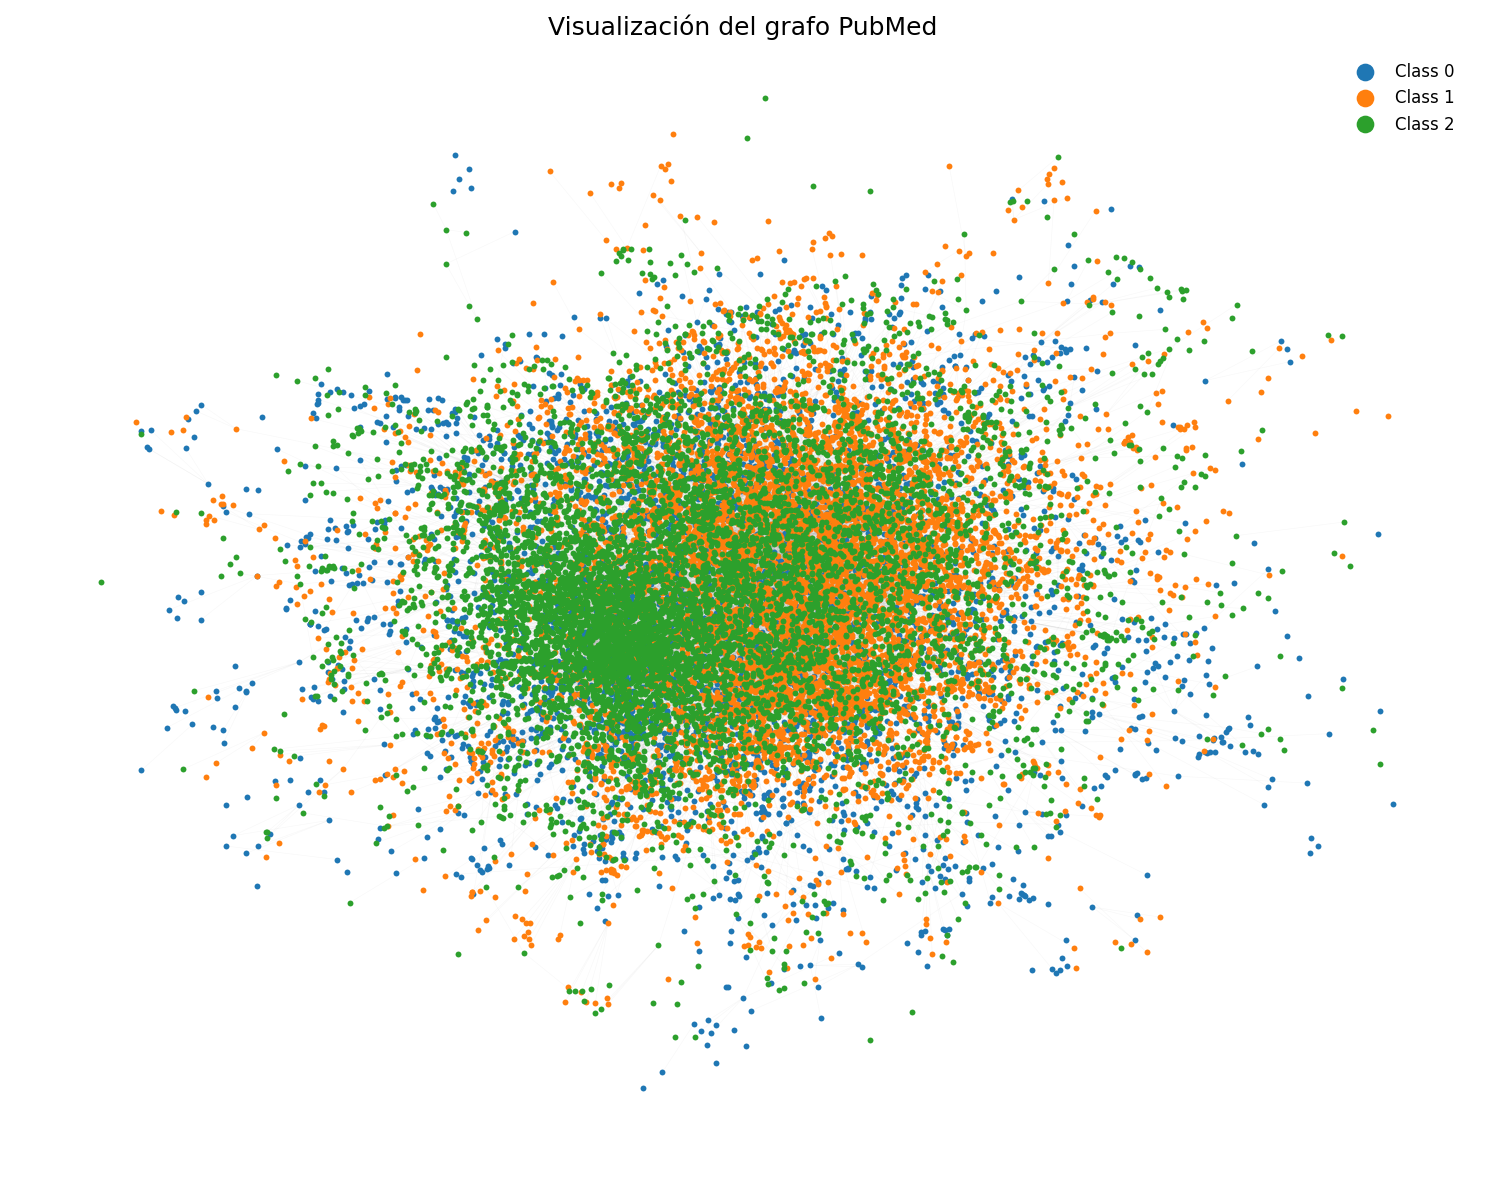

In [ ]:
labels = data.y.cpu().numpy()
classes = np.unique(labels)

pos = nx.spring_layout(G, seed=3)

m = G.number_of_edges()
MAX_EDGES = 15000
if m > MAX_EDGES:
    p = MAX_EDGES / m
    edgelist = [e for e in G.edges() if random.random() < p]
else:
    edgelist = None

plt.figure(figsize=(10, 8), dpi=150)

nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgelist if edgelist is not None else G.edges(),
    alpha=0.06,
    width=0.3,
    edge_color="gray",
)

for c in classes:
    mask = (labels == c)
    nlist = np.flatnonzero(mask).tolist()
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=nlist,
        node_color=plt.cm.tab10(c),
        label=f"Class {c}",
        node_size=8,
        linewidths=0.0,
    )

plt.title("Visualización del grafo PubMed", fontsize=12)
plt.axis("off")
plt.legend(markerscale=3, fontsize=8, frameon=False)
plt.tight_layout()
plt.show()


**Comentario de resultados**:



A partir de las metricas calculadas, y del grafico, se puede observar que PubMed es un grafo conexo de ~20.000 nodos y ~89.000 artistas. Cuenta con 500 features y 3 clases.

El grafo es moderadametne conectado con un grado promedio cercano 4.5, bajo clustering y densidad. Sin embargo, se encuentra bien conectado, con una distancia promedio ~6.3 con ~3.7 de desviación estandar y un diametro de 18. Este es un grafo que puede ser considerado relativamente homogeneo, con las tres clases exparcidas de forma relativamente equitativa en el grafo, ninguna particularmente infrarepresentada, y con nodos muy conectados y otros poco conectados (notar grado max = 171 y grado min = 1).

Finalmente, se destaca que dado que el grafo es conexo, un emdedding de tipe Node2Vec puede funcionar sobre el grafo base.

##1.3 Crear embeddings (8 puntos)

Utilice el modelo Node2Vec para crear 3 representaciones vectoriales de los nodos de la red, modificando el hiperparámetro: ```walk_length=[10, 30, 50]```. Estas representaciones deben tener una dimensionalidad de 128.

Considere un entrenamiento de 10 épocas

Luego, para cada caso, aplique la técnica de reducción de dimensionalidad **Principal component analysis (PCA)** y refleje el comportamiento de los embeddings creados en gráficos 2D. Distinga cada clase con un color diferente. Comente sus resultados.



**Observación**

Se recomienda trabajar con GPU para reducir el tiempo de cómputo.


**Nota**:

No se puede hacer lo que pide el enunciado exactamente, por lo que crearé tres modelos distintos cada uno con un *walk_length* distinto.


'''
TypeError                                 Traceback (most recent call last)
/tmp/ipython-input-2983742400.py in <cell line: 0>()
----> 1 n2v_models = Node2Vec(data.edge_index,
      2                       embedding_dim=128,
      3                       walk_length=[10, 30, 50],
      4                       context_size=10,
      5                       walks_per_node=20,

/usr/local/lib/python3.12/dist-packages/torch_geometric/nn/models/node2vec.py in __init__(self, edge_index, embedding_dim, walk_length, context_size, walks_per_node, p, q, num_negative_samples, num_nodes, sparse)
     78
     79         self.EPS = 1e-15
---> 80         assert walk_length >= context_size
     81
     82         self.embedding_dim = embedding_dim

TypeError: '>=' not supported between instances of 'list' and 'int'
'''

Respuesta:

Se comienza importando los elementos necesarios.

In [ ]:
from torch_geometric.nn import Node2Vec

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Se genera un modelo de embeddings distinto para cada walk_length deseado ([10, 30, 50]).

En cuanto a los parámetros elegidos, se utiliza el embedding_dim deseado y se mantiene el contexto constante para obtener resultados comparables. Se eligió q = 1 para un approach neutral entre BFS y DFS y un p=2 para permitir devolverse bajo cierta probabilidad. Notar que se eligió num_negative_samples=3 para compensar por los nodos con bajo grado en el grafo.

In [ ]:
n2v_model_10wl = Node2Vec(data.edge_index,
                      embedding_dim=128,
                      walk_length=10,
                      context_size=10,
                      walks_per_node=20,
                      num_negative_samples=3,
                      p=2,
                      q=1,
                      sparse=True).to(device)

n2v_model_30wl = Node2Vec(data.edge_index,
                      embedding_dim=128,
                      walk_length=30,
                      context_size=10,
                      walks_per_node=20,
                      num_negative_samples=3,
                      p=2,
                      q=1,
                      sparse=True).to(device)

n2v_model_50wl = Node2Vec(data.edge_index,
                      embedding_dim=128,
                      walk_length=50,
                      context_size=10,
                      walks_per_node=20,
                      num_negative_samples=3,
                      p=2,
                      q=1,
                      sparse=True).to(device)



Se generaon los loaders para cada uno.

In [ ]:
loader_10 = n2v_model_10wl.loader(batch_size=128, shuffle=True, num_workers=2)
loader_30 = n2v_model_30wl.loader(batch_size=128, shuffle=True, num_workers=2)
loader_50 = n2v_model_50wl.loader(batch_size=128, shuffle=True, num_workers=2)

Se generan los optimizadores.

In [ ]:
optimizer_10 = torch.optim.SparseAdam(list(n2v_model_10wl.parameters()), lr=0.01)
optimizer_30 = torch.optim.SparseAdam(list(n2v_model_30wl.parameters()), lr=0.01)
optimizer_50 = torch.optim.SparseAdam(list(n2v_model_50wl.parameters()), lr=0.01)

A continuación se realiza el ciclo de train-test para cada modelo.

In [ ]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in tqdm(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [ ]:
@torch.no_grad()
def test(model):
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

In [ ]:
models = [n2v_model_10wl, n2v_model_30wl, n2v_model_50wl]
loaders = [loader_10, loader_30, loader_50]
optimizers = [optimizer_10, optimizer_30, optimizer_50]

for model, loader, optimizer in zip(models, loaders, optimizers):
    for epoch in range(1, 11):
        loss = train(model, loader, optimizer)
        acc = test(model)
        print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 01, Loss: 8.6819, Acc: 0.3190


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 02, Loss: 6.3184, Acc: 0.3400


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.8396, Acc: 0.3540


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.7679, Acc: 0.3920


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.9675, Acc: 0.4500


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.4014, Acc: 0.4930


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.9929, Acc: 0.5450


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.6974, Acc: 0.5830


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.4814, Acc: 0.6170


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.3247, Acc: 0.6430


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 01, Loss: 4.7853, Acc: 0.4860


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 02, Loss: 1.5106, Acc: 0.6320


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 03, Loss: 0.9955, Acc: 0.7080


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 04, Loss: 0.8891, Acc: 0.7280


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 05, Loss: 0.8541, Acc: 0.7210


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 06, Loss: 0.8383, Acc: 0.7000


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 07, Loss: 0.8292, Acc: 0.6980


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 08, Loss: 0.8238, Acc: 0.7060


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 09, Loss: 0.8203, Acc: 0.6910


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.8183, Acc: 0.7150


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 01, Loss: 4.2590, Acc: 0.5180


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 02, Loss: 1.2343, Acc: 0.6450


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 03, Loss: 0.9161, Acc: 0.7050


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 04, Loss: 0.8566, Acc: 0.7270


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 05, Loss: 0.8356, Acc: 0.7140


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 06, Loss: 0.8255, Acc: 0.6990


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 07, Loss: 0.8198, Acc: 0.6990


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 08, Loss: 0.8163, Acc: 0.6940


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 09, Loss: 0.8141, Acc: 0.6840


  0%|          | 0/155 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.8126, Acc: 0.6890


Accuracies y losses finales:

- 10wl: Loss: 1.3158, Acc: 0.5810
- 30wl: Loss: 0.8182, Acc: 0.6560
- 50wl: Loss: 0.8128, Acc: 0.6770

**PCA:**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n2v_model_10wl.eval()
n2v_model_30wl.eval()
n2v_model_50wl.eval()

with torch.no_grad():
    embeddings_10wl = n2v_model_10wl.embedding.weight.detach().cpu().numpy()
    embeddings_30wl = n2v_model_30wl.embedding.weight.detach().cpu().numpy()
    embeddings_50wl = n2v_model_50wl.embedding.weight.detach().cpu().numpy()

In [ ]:
PCA_10wl = PCA(n_components=2).fit(embeddings_10wl)
PCA_30wl = PCA(n_components=2).fit(embeddings_30wl)
PCA_50wl = PCA(n_components=2).fit(embeddings_50wl)

In [ ]:
data

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])

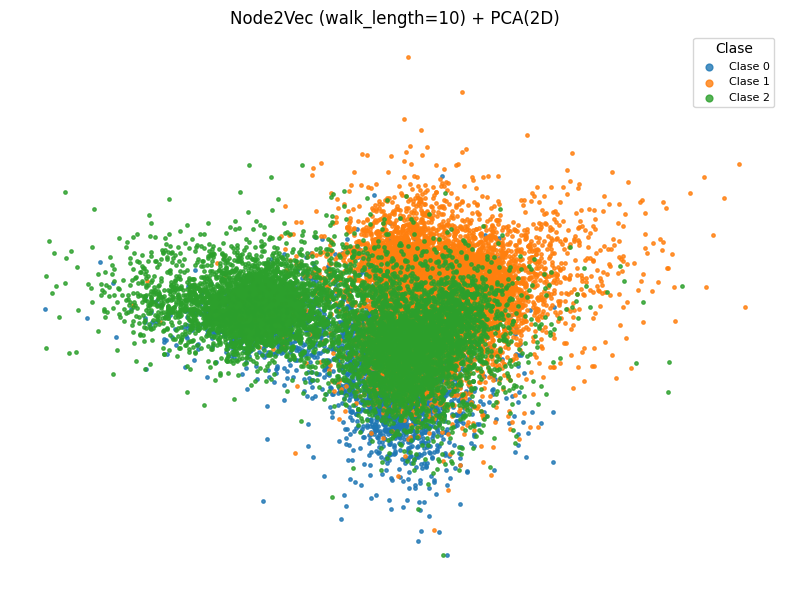

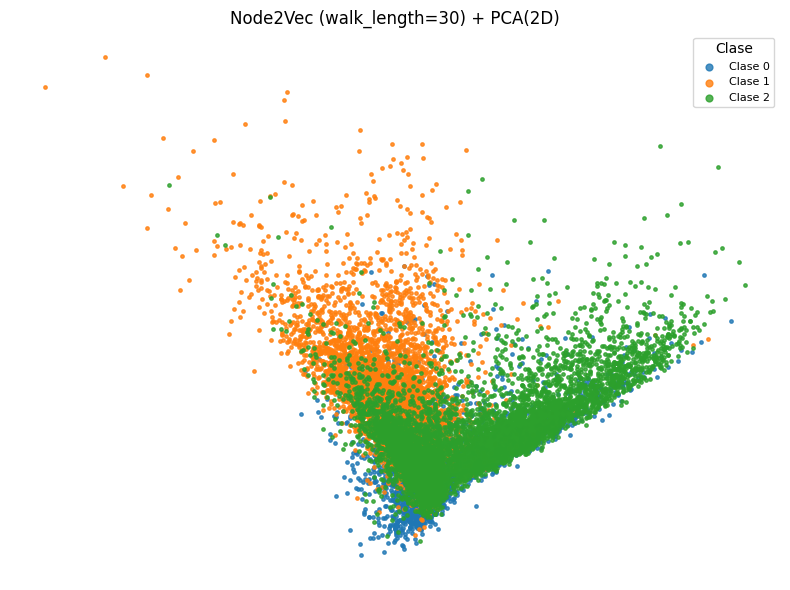

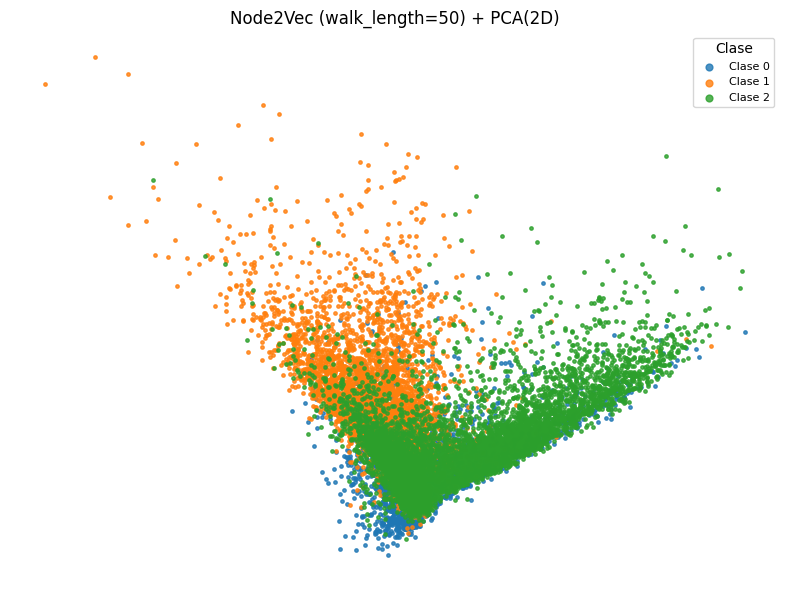

In [ ]:
labels = data.y.cpu().numpy()

# IA plot le quedan muy bonitos.

def plot_2d(embeddings_2d, labels, title):
    plt.figure(figsize=(8, 6))
    classes = np.unique(labels)
    for c in classes:
        mask = labels == c
        plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], s=6, alpha=0.8, label=f'Clase {c}')
    plt.legend(title="Clase", markerscale=2, fontsize=8)
    plt.title(title, fontsize=12)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_2d(PCA_10wl.transform(embeddings_10wl), labels, "Node2Vec (walk_length=10) + PCA(2D)")
plot_2d(PCA_30wl.transform(embeddings_30wl), labels, "Node2Vec (walk_length=30) + PCA(2D)")
plot_2d(PCA_50wl.transform(embeddings_50wl), labels, "Node2Vec (walk_length=50) + PCA(2D)")

Al representar el grafo via Node2Vec, el `walk_length` tiene el rol de decidir que tan largas son las caminatas aleatorias. Dado que se tiene un tamaño de contexto fijo de 10 (nodos no ven puntos más lejos), esto efectivametne significa que mientras más va aumentando `walk_length` más datos de "entrenamiento existen" para Node2Vec y más se explora el grafo.

El resultado de esto se puede ver tanto en las métricas (perdida y accuracy) como en el grafico del PCA con 2 dimensiones. Se puede observar que aquellos con `walk_length`'s más altos logran un mejor entrenamiento y por lo tanto las features del embedding space se distinguen mejor.

##1.4 Entrenar clasificador (6 puntos)

Considerando las tres representaciones creadas para cada grafo, variando el hiperparámetro ```walk_length```, entrene clasificadores multiclase a nivel de nodos. Para ello, considere un método de machine learning.

Utilice un 80% para train y un 20% para test, manteniendo fija la semilla entre todos los conjuntos creados (```random_state``` fijo).

Calcule las métricas precision, recall y F1-score para cada clase.
Compare los resultados obtenidos.

Luego, evalúe el impacto de modificar el hiperparámetro ```walk_length``` en las métricas de evaluación. ¿Qué impacto tiene?

Respuesta:

Para esta pregunta, se utilizarán clasificadores RandomForest de sklearn con los mismos hiperparámetros.

Se importa el modelo y las metricas:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

Partición train-test.

In [ ]:
seed = 42 #Hgttg

In [ ]:
y = data.y.cpu().numpy()

In [ ]:
X_train_10, X_test_10, y_train, y_test = train_test_split(
    embeddings_10wl, y, test_size=0.2, random_state=seed, stratify=y)

X_train_30, X_test_30, _, _ = train_test_split(
    embeddings_30wl, y, test_size=0.2, random_state=seed, stratify=y)

X_train_50, X_test_50, _, _ = train_test_split(
    embeddings_50wl, y, test_size=0.2, random_state=seed, stratify=y)

Se definen los modelos:

In [ ]:
rfc_10wl = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=seed, n_jobs=-1
)

rfc_30wl = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=seed, n_jobs=-1
)

rfc_50wl = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=seed, n_jobs=-1
)

Entrenamiento:

In [ ]:
rfc_10wl.fit(X_train_10, y_train)
rfc_30wl.fit(X_train_30, y_train)
rfc_50wl.fit(X_train_50, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

Predicción y resultados:

In [ ]:
y_pred_10 = rfc_10wl.predict(X_test_10)
y_pred_30 = rfc_30wl.predict(X_test_30)
y_pred_50 = rfc_50wl.predict(X_test_50)

In [ ]:
classification_report_10wl = classification_report(y_test, y_pred_10, digits=3)
classification_report_30wl = classification_report(y_test, y_pred_30, digits=3)
classification_report_50wl = classification_report(y_test, y_pred_50, digits=3)

In [ ]:
print('Classification Report 10WL')
print(classification_report_10wl)
print('\nClassification Report 30WL')
print(classification_report_30wl)
print('\nClassification Report 50WL')
print(classification_report_50wl)

Classification Report 10WL
              precision    recall  f1-score   support

           0      0.749     0.352     0.479       821
           1      0.722     0.848     0.780      1548
           2      0.689     0.761     0.723      1575

    accuracy                          0.710      3944
   macro avg      0.720     0.654     0.661      3944
weighted avg      0.714     0.710     0.695      3944


Classification Report 30WL
              precision    recall  f1-score   support

           0      0.789     0.721     0.754       821
           1      0.828     0.891     0.858      1548
           2      0.846     0.820     0.833      1575

    accuracy                          0.828      3944
   macro avg      0.821     0.811     0.815      3944
weighted avg      0.827     0.828     0.826      3944


Classification Report 50WL
              precision    recall  f1-score   support

           0      0.787     0.750     0.768       821
           1      0.831     0.890     0.859   

A partir de los resultados obtenidos de los clasificadores, se observa que el clasificador entrenado con los embeddings de walk_length = 10 dieron peores resultados que aquellos con walk_length = 30, 50 a través de todas las métricas relevantes por un margen considerable. Por otro lado, los clasificadores con wl = 30 y 50 mostraron una diferencia bastante menor, tal y como se puede observar en el grafico de PCA d=2.

Al mantener los parámetros constantes, incluyendo el tamaño del contexto, el cambiar el walk_length logró efectivamente aumentar el tamaño del entrenamiento, permitiendo al modelo encodear más información del grafo, generando un espacio de embeddings más robusto y bien definido, lo que resulta en que los clasificadores den mejores resultados.

Se nota además que la diferencia entre los wl = 30 y wl = 50 es bastante menor, quizás por estar acercandose a algún tipo de soft bound o por el hecho que el número de epochs es constante, llevando a algún grado de overfitting. Algo posible en este modelo puesto que los nodos más centrales tienden a aparecer en más random paths. Para evaluar puede ser una buena idea cambiar context size, el número d epochs con conjunto de validación, o aumentar el número de negative samples para disminuir el efecto de nodos cabeza y contexto sobrerepresentados.

# Librerías partes 2 y 3

In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install torch==2.2.1
!pip install torchdata==0.7.1
!pip install dgl
!pip install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.20.5
    Uninstalling nvidia-nccl-cu12-2.20.5:
      Successfully uninstalled nvidia-nccl-cu12-2.20.5
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 9.1.0.70
    Uninstalling nvidia-cudnn-cu12-9.1.0.70:
      Successfully uninstalled nvidia-cudnn-cu12-9.1.0.70
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.1+cu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: torchdata
    Found existing installation: torchdata 0.11.0
    Uninstalling torchdata-0.11.0:
      Successfully uninstalled torchdata-0.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtune 0.6.1 requires torchdata==0.11.0, but you have torchdata 0.7.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 116.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import torch
import dgl
import time
import random

In [ ]:
!pip uninstall dgl -y
!pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html

Found existing installation: dgl 2.1.0
Uninstalling dgl-2.1.0:
  Successfully uninstalled dgl-2.1.0
Looking in links: https://data.dgl.ai/wheels/cu121/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.5/467.5 MB 4.3 MB/s eta 0:00:00


#Parte 2: Graph Convolutional Networks (GCN) (20 puntos)

En esta segunda sección se trabajará con dos datasets:

* CiteseerGraphDataset: https://www.dgl.ai/dgl_docs/generated/dgl.data.CiteseerGraphDataset.html#dgl.data.CiteseerGraphDataset

* PubmedGraphDataset: https://www.dgl.ai/dgl_docs/generated/dgl.data.PubmedGraphDataset.html#dgl.data.PubmedGraphDataset

Para instalar dgl en google colab, deben obtener el código desde el siguiente sitio: https://www.dgl.ai/pages/start.html

**Observación**

* Deben utilizar la separación train, val y test que vienen por defecto. Para cada caso, este indicador está reflejado en las variables **train_mask**, **val_mask** y **test_mask** que está disponible al cargar el conjunto de datos.

* Para trabajar con el código visto en clases debe ajustar la versión de pytorch.

Respuesta:

## 2.1 Conceptos básicos (4 puntos)

Responda las siguiente preguntas.

1. Explique los conceptos **AGGREGATE** y **COMBINE** en el contexto de Graph Neural Networks. ¿Qué rol cumplen en la creación de embeddings?


2. ¿Qué relación existe entre **Graph Convolutional Networks** y **Spectral Graph Convolutions**? ¿Qué ventaja tiene GCN?

Respuesta:

1. Explique loss conceptos AGGREGATE y COMBINE en el contexto de Graph Neural Networks. ¿Qué rol cumplen en la creación de embeddings?

La idea detrás de varios de los modelos de Graph Neural Networks es comenzar con un set de embeddings de nodos y actualizar sus representaciónes con la información del grafo. Para esto, la mayoría de los modelos utilizan las "funciones" abstractas AGGREGATE y COMBINE, las cuales van en cada capa de la GNN y varían según el modelo.

Se definen como:

- **AGGREGATE**: agrega la información de los vecinos del nodo.  
- **COMBINE**: combina la información de AGGREGATE con la representación actual del nodo.  

Es importante destacar que en varios algoritmos de GNN se pide que la función en AGGREGATE sea conmutatativa con los embeddings, como por ejemplo en la GCN original en donde se suman los embeddings.

https://youtu.be/zCEYiCxrL_0?si=ct0CEg7Q_bQavY0i&t=1787

2. ¿Qué relación existe entre Graph Convolutional Networks y Spectral Graph Convolutions? ¿Qué ventaja tiene CGN?

Graph Convolutional Networks y Spectral Graph Convolutions son dos tipos de CGN que buscan actualizar los embeddings de cada nodo agregandole la información del grafo.

El procedimiento de Spectral CNN's consiste en realizar convoluciones sobre el grafo moviendolas al espacio de Fourier, aprendiendo el filtro convolucionar. Para esto comienzan con el Laplaciano del grado, definida como $L = D - A$ (Degree - Adyacency matrix), liego, le realizan una descomposición por valores propios resultando en L = $U\Lambda U^{\top}$, de modo que $\Lambda$ son los valores probios y $U$ son los vectores propios (la base de fourier del grafo). Por lo tanto, para un embedding de un nodo inicial x, la transformada de fourier es $\hat{x} = U^{\top}x$ y la transformada inversa es $x = U\hat{x}$. Por lo tanto, al aplicarle el filtro convolucionar en el dominio de Fourier, la convolución por un filtro $g_{\theta}$ es $x \ast g_{\theta} = Ug_{\theta}(\Lambda)U^{\top}x$, con el modelo aprendiendo a través del filtro.

Este modelo, Spectral CNN's realiza convoluciones aprovechandose de la representación matemática del grafo en el dominio de Fourier, sin embargo, tiene un gran problema al ser lento de entrenar y calcular por U, y que el filtro no generaliza a través de grafos.

Por otro lado, las GNS son convolutional neural networks espaciales que funcionan a través de un mecanismo denominado en la literatura como message passing. Esto consiste en que en cada capa de la red, para cada nodo hay una etapa de Aggregate y combine, de modo que se van juntando patrones locales gradualmente, de manera muy similar a como una CNN en computer vision lo haría. Notar que todas estás ecuaciones se resulven de dorma matricial. Para un solo nodo una posible regla de actualización es:

$$
h_t^{(n)} = \sigma \left( \frac{1}{\text{num. vecinos} + 1} \, W_t \left( h_{t-1}^{(n)} + \sum_{t' \in N(t)} h_{t'-1}^{(n)} \right) \right)
$$

Sin embargo, si se decide normalizar via $\frac{1}{\sqrt{deg(i)deg(j)}}$, el resultante es

$$
H^{(t+1)} = \sigma \left( \tilde{D}^{-\tfrac{1}{2}} \, \tilde{A} \, \tilde{D}^{-\tfrac{1}{2}} \, H^{(t)} W^{(t)} \right)
$$
Con las matrices $\tilde{D}$ diagonal de grados y $\tilde{A}$ adyacencia más identidad para self hoops.

A pesar de esto, hay un punto de intersección entre las Spectral GCN's y las GCN, para combatir los problemas con el tiempo de calculo, en un esfuerzo conjunto, los papers "Convolutional Neural Networks on Graphs with Fast Localized Spectral Filtering.” (https://arxiv.org/abs/1606.09375) y "Semi-Supervised Classification with Graph Convolutional Networks" (https://arxiv.org/abs/1609.02907) utilizaron aproximaciones con polinomios de Chebyshev de primer grado, renormaliización y otros trucos para llegar a la formula de actualización:

$$
H^{(t+1)} = \sigma \left( \tilde{D}^{-\tfrac{1}{2}} \, \tilde{A} \, \tilde{D}^{-\tfrac{1}{2}} \, H^{(t)} W^{(t)} \right)
$$

Es decir, se cruzaron ambas áreas, con las GCN obteniendo nuevo sustento matemático.

## 2.2 Análisis descriptivo (4 puntos)

Grafique los grafos **CiteseerGraphDataset** y **PubmedGraphDataset** y calcule medidas descriptivas.

Compare ambas redes.

Respuesta:

**Medidas descriptivas:**

In [ ]:
import dgl
from dgl.data import CiteseerGraphDataset, PubmedGraphDataset

In [ ]:
cs_dataset = CiteseerGraphDataset()
cs_g = cs_dataset[0]

cs_num_class = cs_dataset.num_classes
cs_feat = cs_g.ndata['feat']
cs_train_mask = cs_g.ndata['train_mask']
cs_val_mask = cs_g.ndata['val_mask']
cs_test_mask = cs_g.ndata['test_mask']
cs_label = cs_g.ndata['label']

  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [ ]:
pm_dataset = PubmedGraphDataset()
pm_g = pm_dataset[0]

pm_num_class = pm_dataset.num_classes
pm_feat = pm_g.ndata['feat']
pm_train_mask = pm_g.ndata['train_mask']
pm_val_mask = pm_g.ndata['val_mask']
pm_test_mask = pm_g.ndata['test_mask']
pm_label = pm_g.ndata['label']

  NumNodes: 19717
  NumEdges: 88651
  NumFeats: 500
  NumClasses: 3
  NumTrainingSamples: 60
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


Se pasan a NetworkX para utilizar sus funciones.

In [ ]:
nx_cs_G = nx.from_edgelist([(u.item(), v.item()) for u, v in zip(*cs_g.edges())])
nx_pm_G = nx.from_edgelist([(u.item(), v.item()) for u, v in zip(*pm_g.edges())])

In [ ]:
def get_metrics(G):
    print(f'Densidad del grado: {nx.density(G)}')
    print(f'Grado promedio: {np.mean(list(dict(G.degree()).values()))}')
    print(f'Coeficiente de clustering: {nx.average_clustering(G)}')
    print(f'Grado máximo: {max(dict(G.degree()).values())}')
    print(f'Grado mínimo: {min(dict(G.degree()).values())}')

    print(f'Número de componentes conectadas: {nx.number_connected_components(G)}')

    if nx.is_connected(G):

        print(f'Diametro {nx.diameter(G, usebounds=True)}')
        print(f'Distancia promedio: {nx.average_shortest_path_length(G)}')

    else:

        biggest_subgraph = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(biggest_subgraph)

        print(f'Diametro {nx.diameter(subgraph, usebounds=True)}')
        print(f'Distancia promedio: {nx.average_shortest_path_length(subgraph)}')


In [ ]:
print('Metricas para CiteseerGraph')
get_metrics(nx_cs_G)
print()
print('Metricas para PubMedGraph')
get_metrics(nx_pm_G)

Metricas para CiteseerGraph
Densidad del grado: 0.000845141547653711
Grado promedio: 2.810940787496243
Coeficiente de clustering: 0.14147102442629098
Grado máximo: 99
Grado mínimo: 1
Número de componentes conectadas: 438
Diametro 28
Distancia promedio: 9.329714532486845

Metricas para PubMedGraph
Densidad del grado: 0.00022805452272397372
Grado promedio: 4.496322970025866
Coeficiente de clustering: 0.060175209437523615
Grado máximo: 171
Grado mínimo: 1
Número de componentes conectadas: 1
Diametro 18
Distancia promedio: 6.336870027999047


Analizando ambas redes, lo primero que se observa es que el grafo PubMed es significativamente más grande, con cerca de 5.9 veces más nodos y 9.6 veces más edges. Además, se nota que el grafo Citeseer es bastante disconexo con 438 componentes, mientras que el grafo PubMed tiene 1 componente gigante. Se nota además que el diametro es más grande en la componente más grande de Citeseer que en PubMed. Relacionado a esto, PubMed tiene una distancia promedio más pequeña (en el componente más grande) que Citeseer, y tiene mayor grado promedio a lo largo del grafo, aunque PubMed tiene menor clustering,

A través de estos datos se pueden categotizar los grafos con que Citeseer es un grafo pequeño, con muchas componentes pequeñas, sparce, y no muy conectado con bajo grado y caminos largos. Por otra parte, PubMed es un grafo mucho más grande y más conectado, con una componennte gigane, menor clustering y distancias más cortas en promedio.

Estos resultados pueden ser visualizados en los graficos a continuación.

**Graficos**:

In [ ]:
nx_cs_G = nx_cs_G.to_undirected()
nx_pm_G = nx_pm_G.to_undirected()

In [ ]:

def plot_graph_custom(G, data, title):

    labels = data.ndata['label'].cpu().numpy()
    classes = np.unique(labels)

    pos = nx.spring_layout(G, seed=3)

    m = G.number_of_edges()
    MAX_EDGES = 15000
    if m > MAX_EDGES:
        p = MAX_EDGES / m
        edgelist = [e for e in G.edges() if random.random() < p]
    else:
        edgelist = None

    plt.figure(figsize=(10, 8), dpi=150)

    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=edgelist if edgelist is not None else G.edges(),
        alpha=0.06,
        width=0.3,
        edge_color="gray",
    )

    for c in classes:
        mask = (labels == c)
        nlist = np.flatnonzero(mask).tolist()
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=nlist,
            node_color=plt.cm.tab10(c),
            label=f"Class {c}",
            node_size=8,
            linewidths=0.0,
        )

    plt.title(title, fontsize=12)
    plt.axis("off")
    plt.legend(markerscale=3, fontsize=8, frameon=False)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


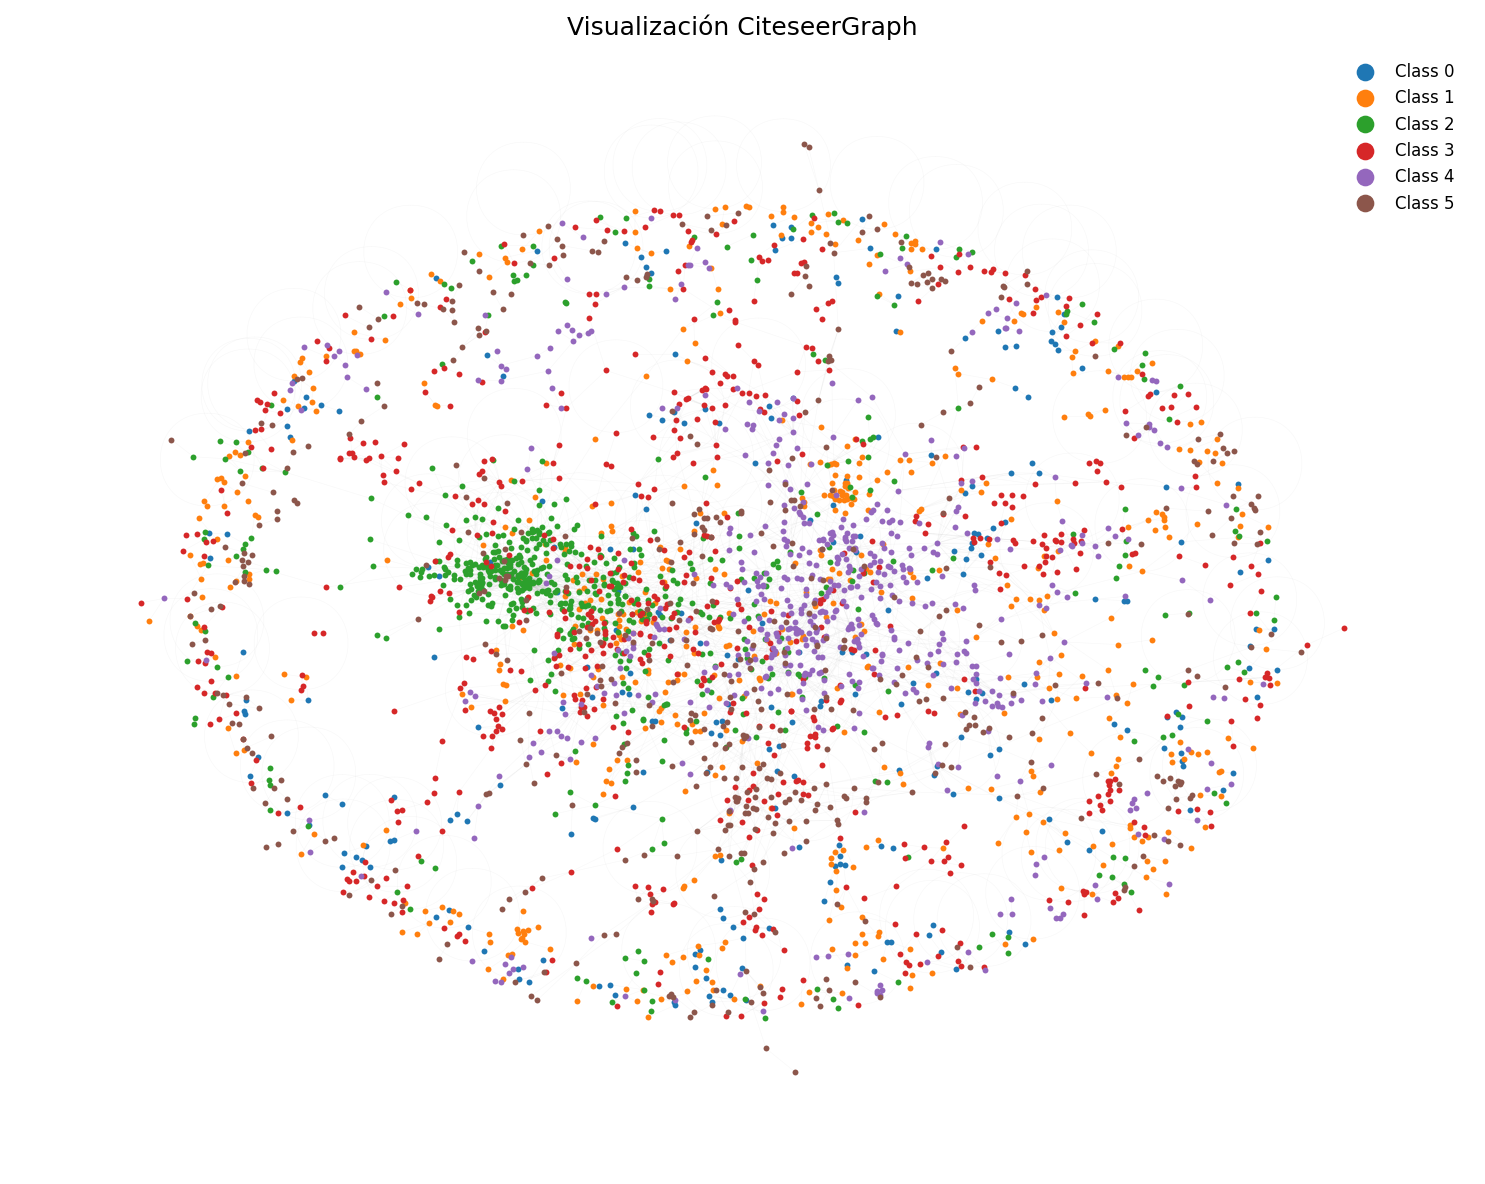

In [ ]:
plot_graph_custom(nx_cs_G, cs_g, 'Visualización CiteseerGraph')

/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


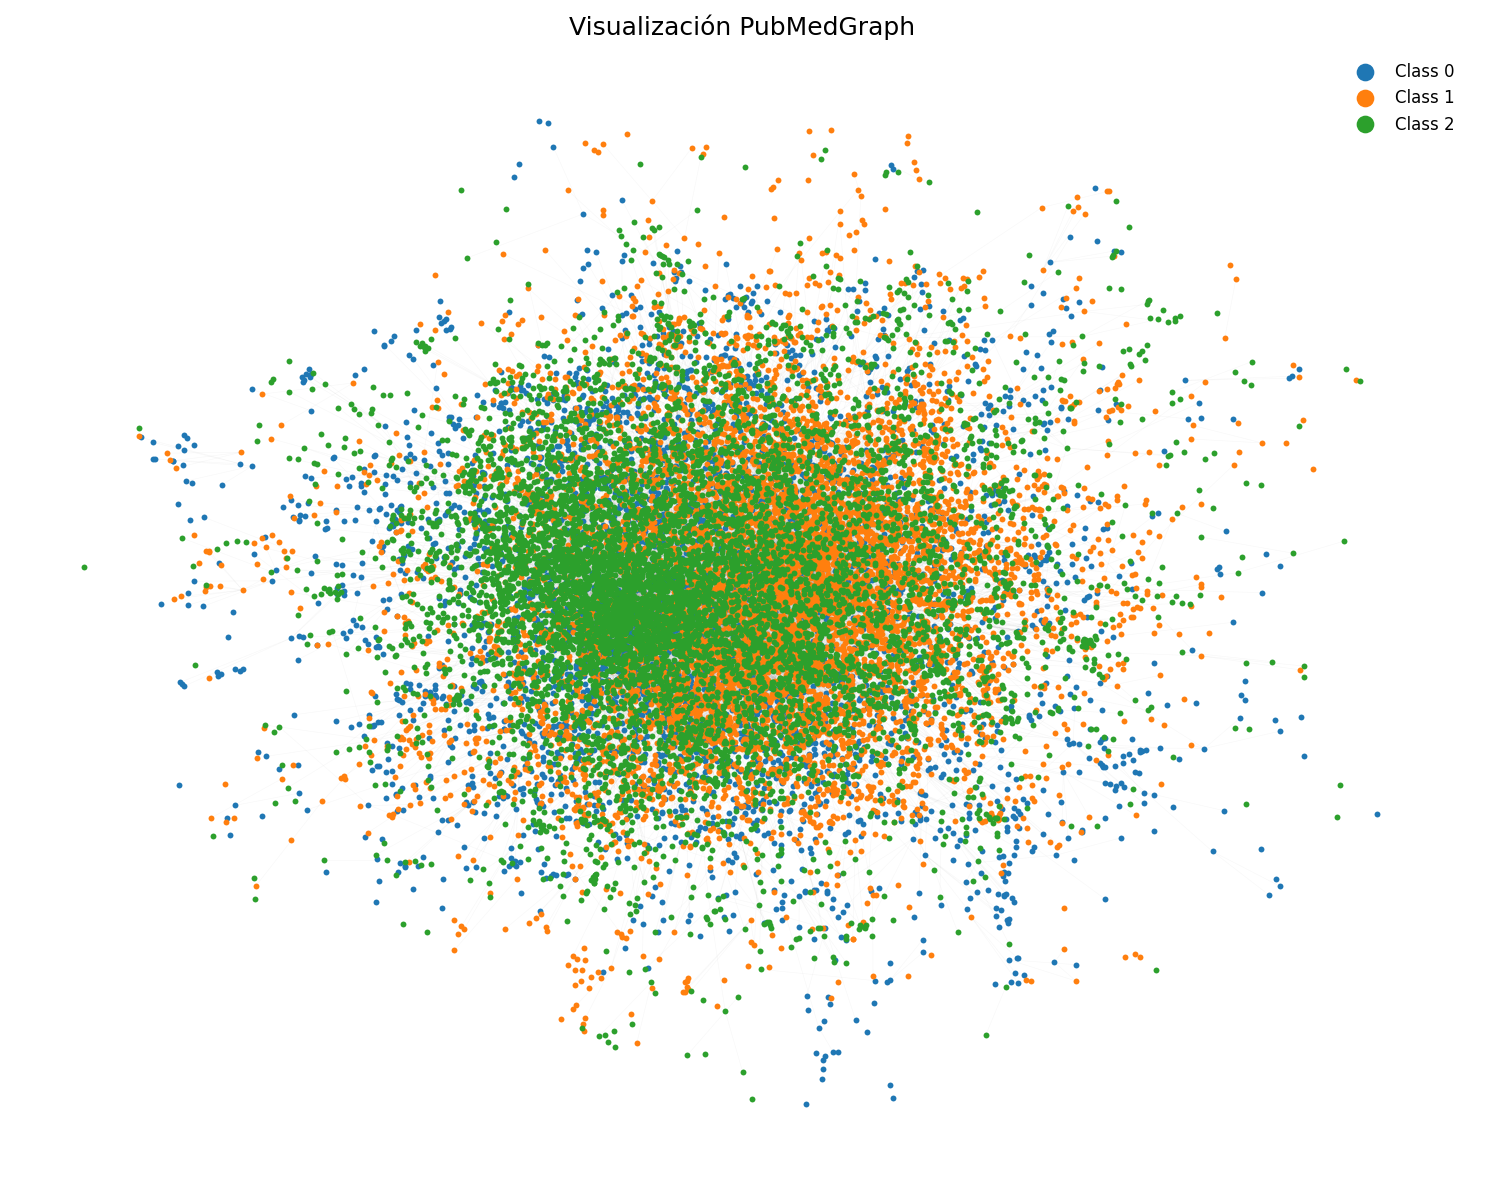

In [ ]:
plot_graph_custom(nx_pm_G, pm_g, 'Visualización PubMedGraph')

##2.3 GCN CiteseerGraphDataset (6 puntos)

Cree un clasificador a nivel de nodos para el conjunto **CiteseerGraphDataset**, utilizando una red GCN. Defina el número de épocas de manera que se garantice la convergencia del entrenamiento y trabaje con los conjuntos ya definidos de train y val. Grafique la función de pérdida y accuracy. Comente sus resultados.

Luego, obtenga las métricas Precision, Recall y F1-score por clase y a nivel general, considerando los conjuntos de val y test de manera independiente. ¿Qué tan bien generaliza el modelo?

Respuesta:

Se importan las librerias, funciones y clases adecuadas.

In [ ]:
import dgl
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GraphConv
import torch as th

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
cs_g.ndata['feat'].shape[1]

3703

Se define la clase principal para la parte 2. Se utilizan dos capas de GraphConv con un dropout de 0.5.

In [ ]:
# Clase principal GGN para la pregunta.

class MyGCN(nn.Module):

    def __init__(self, in_feats, hidden_feats, out_feats):

        super().__init__()
        self.conv1 = GraphConv(in_feats,
                               hidden_feats,
                               norm='both',
                               weight=True,
                               bias=True,
                               activation=F.relu)

        self.conv2 = GraphConv(hidden_feats,
                        out_feats,
                        norm='both',
                        weight=True,
                        bias=True)
        self.dropout = nn.Dropout(0.5)

    def forward(self, g, x):

        x = self.conv1(g, x)
        x = self.dropout(x)
        x = self.conv2(g, x)
        return x

A continuación se definen funciones para evaluar, early stopping, y entrenar.

In [ ]:
def evaluate(model, g, features, labels, mask):
    model.eval()
    with th.no_grad():
        logits = model(g, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = th.max(logits, dim=1)
        correct = th.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, path='best_model.pth'):
        """
        Args:
            patience (int): Número de épocas que esperará sin mejora antes de detener el entrenamiento.
            delta (float): Mínima mejora requerida para ser considerada una mejora.
            path (str): Ruta para guardar el mejor modelo.
        """
        self.patience = patience
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Guarda el mejor modelo cuando ocurre una mejora en la pérdida de validación.'''
        print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [ ]:

def train(model, g, features, labels, train_mask, val_mask, optimizer,
          early_stopping):

    dur = []

    train_losses = []
    test_acc = []


    for epoch in range(100):

        if epoch >= 0:
            t0 = time.time()
        model.train()
        logits = model(g, features)
        logp = F.log_softmax(logits, 1)
        loss = F.nll_loss(logp[train_mask], labels[train_mask])

        train_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch >= 0:
            dur.append(time.time() - t0)
        acc = evaluate(model, g, features, labels, val_mask)
        print(
            "Epoch {:05d} | Loss {:.4f} | Test Acc {:.4f} | Time(s) {:.4f}".format(
                epoch, loss.item(), acc, np.mean(dur)
            )
        )

        test_acc.append(acc)

        early_stopping(loss, model)

        if early_stopping.early_stop:
            print("Early stopping")
            return dur, test_acc, train_losses
    return dur, test_acc, train_losses

Se generan los modelos CGN para cada dataset.

In [ ]:
cs_GCN_model = MyGCN(in_feats=cs_g.ndata['feat'].shape[1],
                         hidden_feats = 64,
                         out_feats=cs_num_class)

pm_GCN_model = MyGCN(in_feats=pm_g.ndata['feat'].shape[1],
                         hidden_feats = 64,
                         out_feats=pm_num_class)


Se generan los optimizers y los objetos EarlyStopping.

In [ ]:
cs_optimizer = th.optim.Adam(cs_GCN_model.parameters(), lr=0.01,
                             weight_decay=5e-4)
pm_optimizer = th.optim.Adam(pm_GCN_model.parameters(), lr=0.01,
                             weight_decay=5e-4)

In [ ]:
early_stopping1 = EarlyStopping(patience=3, delta=0.001)
early_stopping2 = EarlyStopping(patience=3, delta=0.001)

¡Importante! Se agrega un self loop para que se puedan pasar mensajes entre los nodos. El modelo no lo hace por si solo y es particularmente importante para nodos con grado = 0. No pasa en PubMed por grafo conexo pero ayuda de todas formas en la generalización.

In [ ]:
# Agregar self loop!
cs_g = dgl.add_self_loop(cs_g)
pm_g = dgl.add_self_loop(pm_g)

In [ ]:
#Normalizar
# X = cs_g.ndata['feat']
# cs_g.ndata['feat'] = (X - X.mean(0)) / (X.std(0) + 1e-6)

# X = pm_g.ndata['feat']
# pm_g.ndata['feat'] = (X - X.mean(0)) / (X.std(0) + 1e-6)

# Pesima idea jajs bajó mucho el rendimiento.

Se entrena el modelo GCN para Citeseer:

In [ ]:
cs_gcn_time, cs_gcn_test_acc, cs_gcn_train_losses = train(
    cs_GCN_model.to(device),
    cs_g.to(device),
    cs_g.ndata['feat'].to(device),
    cs_g.ndata['label'].to(device),
    cs_g.ndata['train_mask'].to(device),
    cs_g.ndata['val_mask'].to(device),
    cs_optimizer,
    early_stopping1)

Epoch 00000 | Loss 1.7923 | Test Acc 0.2900 | Time(s) 0.0070
Validation loss decreased (inf --> 1.792291). Saving model...
Epoch 00001 | Loss 1.7840 | Test Acc 0.3880 | Time(s) 0.0063
Validation loss decreased (1.792291 --> 1.784000). Saving model...
Epoch 00002 | Loss 1.7746 | Test Acc 0.4480 | Time(s) 0.0059
Validation loss decreased (1.784000 --> 1.774600). Saving model...
Epoch 00003 | Loss 1.7633 | Test Acc 0.5020 | Time(s) 0.0058
Validation loss decreased (1.774600 --> 1.763311). Saving model...
Epoch 00004 | Loss 1.7488 | Test Acc 0.5200 | Time(s) 0.0057
Validation loss decreased (1.763311 --> 1.748756). Saving model...
Epoch 00005 | Loss 1.7388 | Test Acc 0.5480 | Time(s) 0.0056
Validation loss decreased (1.748756 --> 1.738772). Saving model...
Epoch 00006 | Loss 1.7132 | Test Acc 0.5400 | Time(s) 0.0056
Validation loss decreased (1.738772 --> 1.713215). Saving model...
Epoch 00007 | Loss 1.6986 | Test Acc 0.5340 | Time(s) 0.0056
Validation loss decreased (1.713215 --> 1.698555

**Metricas de error**

In [ ]:
# Conseguir metricas de error.
from sklearn.metrics import classification_report

In [ ]:
def get_predictions(model, g, features, labels, mask):
    model.eval()
    with th.no_grad():
        logits = model(g, features)
        y_pred = logits.argmax(1).cpu().numpy()
        y_true = g.ndata['label'].cpu().numpy()
        return y_pred, y_true

In [ ]:
y_pred, y_true = get_predictions(cs_GCN_model,
                                 cs_g.to(device),
                                 cs_g.ndata['feat'].to(device),
                                 cs_g.ndata['label'].to(device),
                                 cs_g.ndata['test_mask'].to(device))

In [ ]:
print(classification_report(y_true[cs_g.ndata['test_mask'].cpu().numpy()],
                      y_pred[cs_g.ndata['test_mask'].cpu().numpy()],
                            digits=3))

              precision    recall  f1-score   support

           0      0.341     0.403     0.369        77
           1      0.680     0.632     0.655       182
           2      0.732     0.740     0.736       181
           3      0.859     0.736     0.793       231
           4      0.801     0.811     0.806       169
           5      0.702     0.825     0.759       160

    accuracy                          0.719      1000
   macro avg      0.686     0.691     0.686      1000
weighted avg      0.729     0.719     0.722      1000



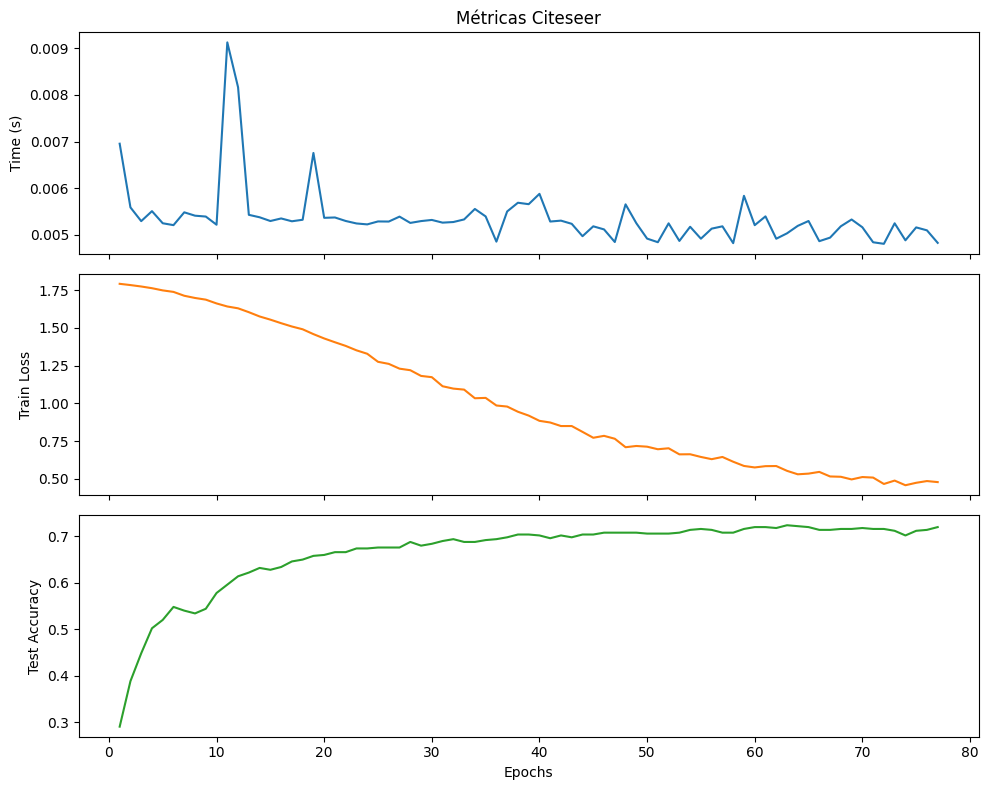

In [ ]:
T = list(range(1, len(cs_gcn_time) + 1))

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(T, cs_gcn_time, color="tab:blue")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Métricas Citeseer")

axes[1].plot(T, cs_gcn_train_losses, color="tab:orange")
axes[1].set_ylabel("Train Loss")

axes[2].plot(T, cs_gcn_test_acc, color="tab:green")
axes[2].set_ylabel("Test Accuracy")
axes[2].set_xlabel("Epochs")

plt.tight_layout()
plt.show()


Al graficar las funciones de perdida y accuracy se hace claro que cerca del epoch 74 la función de perdida y la precisión se estabilizan, alcanzando valores de loss = 0.4744 y accuracy en validation = 0.7120. Es decir, se observa que el modelo converge en buena medida. Además se destaca que los primeros epochs son los más importantes en cuanto a disminuir la perdida y aumentar el accuracy.

En cuanto a las metricas a nivel general, con el conjunto de testing se puede ver como los resultados empeoraron ligeramente en comparación a validation, pero que en general otorga buenos resultados para las clases exceptuando la clase 0, la cual tiene muy mal rendimiento (f1 = 0.369). Comparando con el grafico del grafo, se observa que la clase 0 tiene pocos nodos y se encuentra bastante exparcido, lo que explica su mal resdimiento en un modelo "espacial" como lo es CGN. Además, se destaca que las clases con más nodos tienen un mejore rendimiento en promedio (weighed avg en las categorias).

En general, el modelo generaliza bastante bien la mayoria de las clases, pero se cae un poco, posiblemente por la estrucura del grafo y repartición de las clases.

##2.4 GCN PubmedGraphDataset (6 puntos)

Cree un clasificador a nivel de nodos para el conjunto **PubmedGraphDataset**, utilizando una red GCN. Defina el número de épocas de manera que se garantice la convergencia del entrenamiento y trabaje con los conjuntos ya definidos de train y val. Grafique la función de pérdida y accuracy. Comente sus resultados.

Luego, obtenga las métricas Precision, Recall y F1-score por clase y a nivel general, considerando los conjuntos de val y test de manera independiente. ¿Qué tan bien generaliza el modelo?

Respuesta:

Se trabaja como en la parte anterior.

In [ ]:
pm_GCN_model = MyGCN(in_feats=pm_g.ndata['feat'].shape[1],
                         hidden_feats = 64,
                         out_feats=pm_num_class)

In [ ]:
pm_optimizer = th.optim.Adam(pm_GCN_model.parameters(), lr=0.01,
                             weight_decay=5e-4)

In [ ]:
early_stopping2 = EarlyStopping(patience=3, delta=0.001)

In [ ]:
pm_gcn_time, pm_gcn_test_acc, pm_gcn_train_losses = train(
    pm_GCN_model.to(device),
    pm_g.to(device),
    pm_g.ndata['feat'].to(device),
    pm_g.ndata['label'].to(device),
    pm_g.ndata['train_mask'].to(device),
    pm_g.ndata['val_mask'].to(device),
    pm_optimizer,
    early_stopping2)

Epoch 00000 | Loss 1.0992 | Test Acc 0.2120 | Time(s) 0.0094
Validation loss decreased (inf --> 1.099150). Saving model...
Epoch 00001 | Loss 1.0883 | Test Acc 0.3240 | Time(s) 0.0074
Validation loss decreased (1.099150 --> 1.088279). Saving model...
Epoch 00002 | Loss 1.0768 | Test Acc 0.5800 | Time(s) 0.0068
Validation loss decreased (1.088279 --> 1.076799). Saving model...
Epoch 00003 | Loss 1.0653 | Test Acc 0.6960 | Time(s) 0.0065
Validation loss decreased (1.076799 --> 1.065340). Saving model...
Epoch 00004 | Loss 1.0501 | Test Acc 0.7340 | Time(s) 0.0063
Validation loss decreased (1.065340 --> 1.050054). Saving model...
Epoch 00005 | Loss 1.0330 | Test Acc 0.7440 | Time(s) 0.0061
Validation loss decreased (1.050054 --> 1.032972). Saving model...
Epoch 00006 | Loss 1.0156 | Test Acc 0.7480 | Time(s) 0.0060
Validation loss decreased (1.032972 --> 1.015555). Saving model...
Epoch 00007 | Loss 0.9997 | Test Acc 0.7480 | Time(s) 0.0059
Validation loss decreased (1.015555 --> 0.999650

In [ ]:
y_pred, y_true = get_predictions(pm_GCN_model.to(device),
                                 pm_g.to(device),
                                 pm_g.ndata['feat'].to(device),
                                 pm_g.ndata['label'].to(device),
                                 pm_g.ndata['test_mask'].to(device))

In [ ]:
print(classification_report(y_true[pm_g.ndata['test_mask'].cpu().numpy()],
                      y_pred[pm_g.ndata['test_mask'].cpu().numpy()],
                            digits=3))

              precision    recall  f1-score   support

           0      0.783     0.761     0.772       180
           1      0.789     0.833     0.810       413
           2      0.810     0.774     0.791       407

    accuracy                          0.796      1000
   macro avg      0.794     0.789     0.791      1000
weighted avg      0.796     0.796     0.796      1000



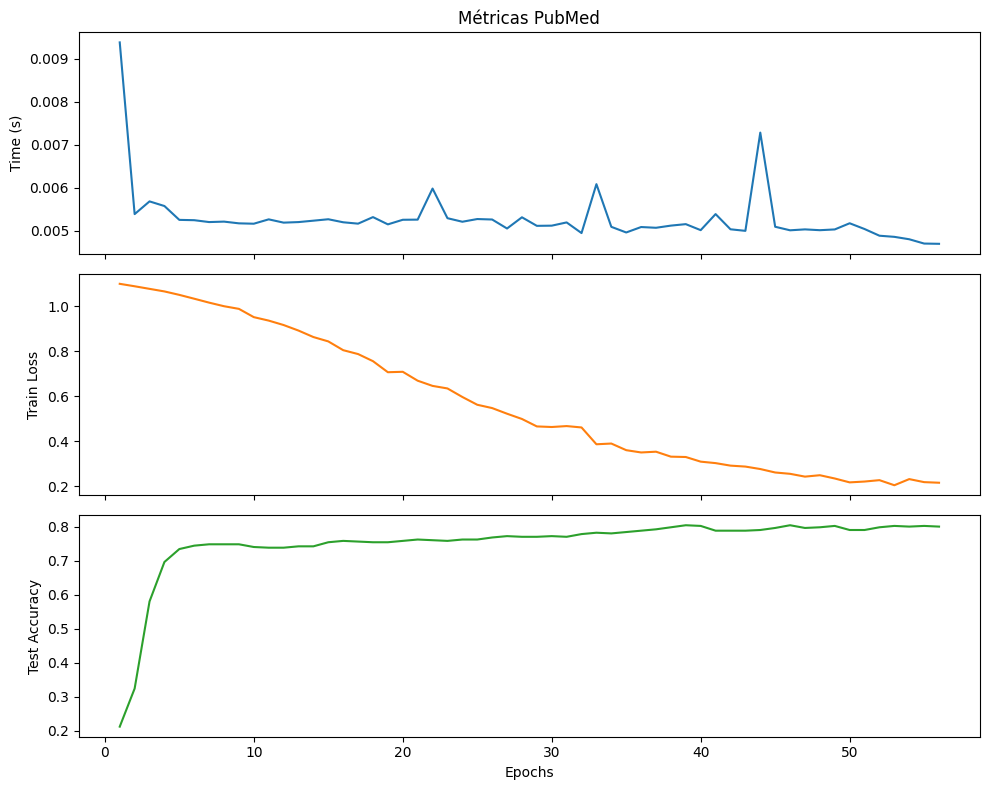

In [ ]:
T = list(range(1, len(pm_gcn_time) + 1))

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(T, pm_gcn_time, color="tab:blue")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Métricas PubMed")

axes[1].plot(T, pm_gcn_train_losses, color="tab:orange")
axes[1].set_ylabel("Train Loss")

axes[2].plot(T, pm_gcn_test_acc, color="tab:green")
axes[2].set_ylabel("Test Accuracy")
axes[2].set_xlabel("Epochs")

plt.tight_layout()
plt.show()


Lo primero que destaca del entrenamiento es la curva casi lineal en que baja train loss y aumenta accuracy tras un pequeño burner. Ya desde el epoch 52 que el modelo convergió en entrenamiento a loss = 0.2044 y validation accuracy = 0.8020. Pocos problemas en entrenamiento.

En cuanto a los resultados, se obtuvo muy buena generalización a través de todas las clases, con presición, recall y f1 todos cercanos a 0.79, con ninguna clase divergiendo mucho de la media en ningún estadistico.

El que este modelo haya dado tan buenos resultados puede deberse a la estructura del grafo, una sola componente conexa, distancias más pequeñas, y una repartición más homogenea de los datos, algo que no se daba en Citeseer. Aunque es importante notar que menor número de clases (3) en comparación a las 6 del grafo Citeseer puede haber ayudado a las estadisticas en cierta medida.

En resumen, el modelo CGN generaliza de muy buena manera este grafo.

# Parte 3: Graph Attention Networks (GAT) (16 puntos)

En esta sección debe continuar trabajando con los dos conjuntos de datos utilizados en la Parte 2: **CiteseerGraphDataset** y **PubmedGraphDataset**.

## 3.1 Conceptos básicos (4 puntos)

Responda las siguiente preguntas.

1. Explique el concepto de **atención neuronal** en el contexto de grafos. ¿Qué rol cumple el uso de **multi-head attention**?

2. ¿En qué tipo de grafos **GAT** suele funcionar mejor que **GCN**? ¿En qué situaciones sería preferible usar **GCN** en vez de **GAT**?

Respuesta:

1. Explique el concepto de atención neuronal en el contexto de grafos. ¿Qué rol cumple el uso de multi-head attention?

En el contexto de NLP, attention es un mecanismo a través del cual dada una frase, cada elemento (token) se ven enriquecidos del contexto ofrecidos por los otros elementos de la frase. En un solo attention mechanism, esto se realiza a través de las matrices entrenables de Keys, queries, y Values. Se multiplica el embedding de cada token por las matrices, una vez por key, otra por query, se calcula el producto punto, softmax, y el vector resultante se pasa por las value matriz para encodearlo. El mecanismo se puede pensar como una manera de encodear algún aspecto de los datos (de la misma forma que se entrena un filtro en una CNN) a través de las matrices. La verdadera ventaja de este mecanismo es que es altamente paralelizable, y que al usar multi-head attention, se pueden generar distintos patrones y maneras en que los queries attend to they keys, capturando más patrones.

En el contexto de grafos, attention es un mecanismo en que cada nodo busca determinar cuanto aprender de los embeddings de sus vecinos. Para esto, cuenta con un coeficiente $\alpha_{ij}$ para cada arista que son calculados dinámicamente en función de los ebeddings de los nodos y normalizados con softmax. Es un mecanismo distinto a el de atención en NLP, pero la idea detrás es similar.

En el caso de multi-head attention, cada cabeza aprende un patrón distinto de las relaciones entre vecinos entre nodos, logrando mayor representación de patrones (al igual que en NLP). Para la implementación de atención en grafos se concatenan los resultados por cada cabeza de atención y en la final se promedian por temas de estabilidad.

2. ¿En qué tipo de grafos **GAT** suele funcionar mejor que **GCN**? ¿En qué situaciones sería preferible usar **GCN** en vez de **GAT**?

La prinicpal ventaja de GAT es que puede asignar pesos distintos a cada vecino según la head, lo que le permite discriminar en cotra de nodos poco informativos. Además, los coeficientes pueden ser utilizados para medir la fuerza de las interacciones. Aunque es más pesada que GCN. Por el otro lado, CGN es excelente por su velocidad y por su capacidad de capturar patrones, aunque le cuesta más asignar valores y discriminar entre vecinos no informativos e informativos para actualizar los embeddings.

Por lo tanto, GAT puede ser preferible en grafos heterogeneos, donde cada vecino tiene una relevancia distinta, y en donde el poder de computo no es un problema. Mientras que CGN puede ser preferible por sobre GAT en contextos en donde los grafos son homogeneos, en donde cada nodo da información similar, se tienen grafos grandes y bien portados, y hay buena información local.

## 3.2 GAT CiteseerGraphDataset (6 puntos)

Cree un clasificador a nivel de nodos para el conjunto **CiteseerGraphDataset**, utilizando una red GAT. Defina el número de épocas de manera que se garantice la convergencia del entrenamiento y trabaje con los conjuntos ya definidos de train y val. Grafique la función de pérdida y accuracy. Comente sus resultados.

Luego, obtenga las métricas Precision, Recall y F1-score por clase y a nivel general, considerando los conjuntos de val y test de manera independiente. ¿Qué tan bien generaliza el modelo?



Respuesta:

Se importa la capa GATConv del paper original:

In [ ]:
from dgl.nn.pytorch.conv import GATConv

Clase principal de GAT, son dos capas de atención con activación post ELU, bias, y dropout de 0.5. La primera capa tiene 8 heads y la primera una. Originalmente se intentó el método del paper original de concatenación + promedio en última capa pero utilizar una sola head en la segunda capa dió mejores resultados.

In [ ]:
class MyGAT(nn.Module):

    def __init__(self, in_feats, hidden_perhead_feats, out_feats):

        super().__init__()
        self.gat_layer1 = GATConv(in_feats=in_feats,
                                  out_feats=hidden_perhead_feats,
                                  num_heads=8,
                                  feat_drop=0.5,
                                  attn_drop=0.5,
                                  negative_slope=0.2,
                                  residual=True, #Arquitectura poco deep no gepeto
                                  activation=F.elu,
                                  bias=True)

        self.gat_layer2 = GATConv(in_feats=8 * hidden_perhead_feats,
                                  out_feats=out_feats,
                                  num_heads=1,
                                  feat_drop=0.5,
                                  attn_drop=0.5,
                                  negative_slope=0.2,
                                  residual=False,
                                  activation=None,
                                  bias=True)

        self.dropout = nn.Dropout(0.5)

    def forward(self, g, x):

        x = self.dropout(x)

        x = self.gat_layer1(g, x)
        x = x.flatten(1)

        x = self.gat_layer2(g, x)
        x = x.squeeze(1)

        # Intente como decia el paper de promediar la ultima capa en vez de
        # concatenar pero no me dio muy buenos resultados.

        return x

Se define el modelo y los objetos acompañantes.

In [ ]:
cs_GAT_model = MyGAT(in_feats=cs_g.ndata['feat'].shape[1],
                         hidden_perhead_feats = 8,
                         out_feats=cs_num_class)

In [ ]:
cs_GAT_optimizer = th.optim.Adam(cs_GAT_model.parameters(), lr=0.01,
                             weight_decay=5e-4)

In [ ]:
early_stopping1 = EarlyStopping(patience=3, delta=0.001)

Se entrena el modelo.

In [ ]:
cs_gat_time, cs_gat_test_acc, cs_gat_train_losses = train(
    cs_GAT_model.to(device),
    cs_g.to(device),
    cs_g.ndata['feat'].to(device),
    cs_g.ndata['label'].to(device),
    cs_g.ndata['train_mask'].to(device),
    cs_g.ndata['val_mask'].to(device),
    cs_GAT_optimizer,
    early_stopping1)

Epoch 00000 | Loss 1.7900 | Test Acc 0.3700 | Time(s) 0.1022
Validation loss decreased (inf --> 1.789951). Saving model...
Epoch 00001 | Loss 1.7756 | Test Acc 0.4740 | Time(s) 0.0557
Validation loss decreased (1.789951 --> 1.775599). Saving model...
Epoch 00002 | Loss 1.7505 | Test Acc 0.5720 | Time(s) 0.0401
Validation loss decreased (1.775599 --> 1.750454). Saving model...
Epoch 00003 | Loss 1.7148 | Test Acc 0.5020 | Time(s) 0.0327
Validation loss decreased (1.750454 --> 1.714781). Saving model...
Epoch 00004 | Loss 1.6681 | Test Acc 0.4100 | Time(s) 0.0280
Validation loss decreased (1.714781 --> 1.668148). Saving model...
Epoch 00005 | Loss 1.6557 | Test Acc 0.4400 | Time(s) 0.0249
Validation loss decreased (1.668148 --> 1.655725). Saving model...
Epoch 00006 | Loss 1.5969 | Test Acc 0.4780 | Time(s) 0.0227
Validation loss decreased (1.655725 --> 1.596888). Saving model...
Epoch 00007 | Loss 1.5731 | Test Acc 0.5240 | Time(s) 0.0210
Validation loss decreased (1.596888 --> 1.573133

Se evalúa el modelo.

In [ ]:
y_pred, y_true = get_predictions(cs_GAT_model,
                                 cs_g.to(device),
                                 cs_g.ndata['feat'].to(device),
                                 cs_g.ndata['label'].to(device),
                                 cs_g.ndata['test_mask'].to(device))

In [ ]:
print(classification_report(y_true[cs_g.ndata['test_mask'].cpu().numpy()],
                      y_pred[cs_g.ndata['test_mask'].cpu().numpy()],
                            digits=3))

              precision    recall  f1-score   support

           0      0.354     0.377     0.365        77
           1      0.665     0.588     0.624       182
           2      0.647     0.768     0.702       181
           3      0.851     0.693     0.764       231
           4      0.789     0.817     0.802       169
           5      0.715     0.800     0.755       160

    accuracy                          0.701      1000
   macro avg      0.670     0.674     0.669      1000
weighted avg      0.709     0.701     0.702      1000



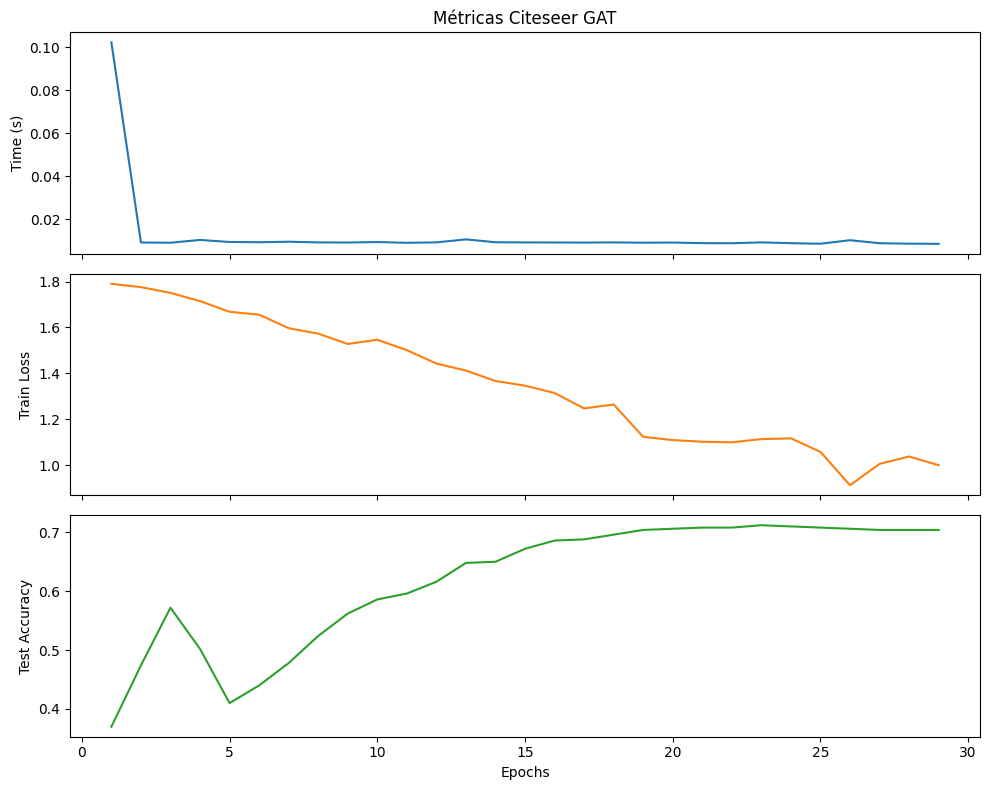

In [ ]:
T = list(range(1, len(cs_gat_time) + 1))

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(T, cs_gat_time, color="tab:blue")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Métricas Citeseer GAT")

axes[1].plot(T, cs_gat_train_losses, color="tab:orange")
axes[1].set_ylabel("Train Loss")

axes[2].plot(T, cs_gat_test_acc, color="tab:green")
axes[2].set_ylabel("Test Accuracy")
axes[2].set_xlabel("Epochs")

plt.tight_layout()
plt.show()


A partir de los resultados, se observa que ya desde el epoch 25 en adelante el modelo converge, con el epoch con mejor loss siendo el 25 con loss = 0.9133 y validation accuracy de 0.7060. En general, se nota que el modelo converge, pero se observan inestabilidades en los últimos epochs.

En cuanto a los resultados, se obtuvo buena generalización en promedio, con los estadisticos f1, recall y precisión cercanos a 0.67. Se nota que el promedio se ve afectado significativamente por la clase 0, y clases con pocos nodos, pues los weighted avereges rondean 0.7 y la clase 0 rondea 0.36 en sus estadisticos. Se nota además que la clase 3 alcanza muy buena precisión, debido posiblemente a su mayor representación en el dataset. En general, a pesar de la composición del grafo se lograron bastantes buenos resultados.

##3.3 GAT PubmedGraphDataset (6 puntos)

Cree un clasificador a nivel de nodos para el conjunto **PubmedGraphDataset**, utilizando una red GAT. Defina el número de épocas de manera que se garantice la convergencia del entrenamiento y trabaje con los conjuntos ya definidos de train y val. Grafique la función de pérdida y accuracy. Comente sus resultados.

Luego, obtenga las métricas Precision, Recall y F1-score por clase y a nivel general, considerando los conjuntos de val y test de manera independiente. ¿Qué tan bien generaliza el modelo?

Respuesta:

Se define el modelo y los objetos acompañantes como en la parte anterior.

In [ ]:
pm_GAT_model = MyGAT(in_feats=pm_g.ndata['feat'].shape[1],
                         hidden_perhead_feats = 8,
                         out_feats=pm_num_class)

In [ ]:
pm_GAT_optimizer = th.optim.Adam(pm_GAT_model.parameters(), lr=0.01,
                                 weight_decay=5e-4)

In [ ]:
early_stopping2 = EarlyStopping(patience=3, delta=0.001)

Se entrena el modelo.

In [ ]:
pm_gat_time, pm_gat_test_acc, pm_gat_train_losses = train(
    pm_GAT_model.to(device),
    pm_g.to(device),
    pm_g.ndata['feat'].to(device),
    pm_g.ndata['label'].to(device),
    pm_g.ndata['train_mask'].to(device),
    pm_g.ndata['val_mask'].to(device),
    pm_GAT_optimizer,
    early_stopping2)

Epoch 00000 | Loss 1.1123 | Test Acc 0.5620 | Time(s) 0.0102
Validation loss decreased (inf --> 1.112275). Saving model...
Epoch 00001 | Loss 1.0632 | Test Acc 0.6680 | Time(s) 0.0097
Validation loss decreased (1.112275 --> 1.063172). Saving model...
Epoch 00002 | Loss 1.0402 | Test Acc 0.6660 | Time(s) 0.0095
Validation loss decreased (1.063172 --> 1.040242). Saving model...
Epoch 00003 | Loss 0.9964 | Test Acc 0.7060 | Time(s) 0.0096
Validation loss decreased (1.040242 --> 0.996438). Saving model...
Epoch 00004 | Loss 0.9658 | Test Acc 0.7440 | Time(s) 0.0100
Validation loss decreased (0.996438 --> 0.965750). Saving model...
Epoch 00005 | Loss 0.9415 | Test Acc 0.7520 | Time(s) 0.0098
Validation loss decreased (0.965750 --> 0.941485). Saving model...
Epoch 00006 | Loss 0.8958 | Test Acc 0.7460 | Time(s) 0.0098
Validation loss decreased (0.941485 --> 0.895835). Saving model...
Epoch 00007 | Loss 0.8296 | Test Acc 0.7540 | Time(s) 0.0097
Validation loss decreased (0.895835 --> 0.829564

Se evalúa el modelo.

In [ ]:
y_pred, y_true = get_predictions(pm_GAT_model,
                                 pm_g.to(device),
                                 pm_g.ndata['feat'].to(device),
                                 pm_g.ndata['label'].to(device),
                                 pm_g.ndata['test_mask'].to(device))

In [ ]:
print(classification_report(y_true[pm_g.ndata['test_mask'].cpu().numpy()],
                      y_pred[pm_g.ndata['test_mask'].cpu().numpy()],
                            digits=3))

              precision    recall  f1-score   support

           0      0.704     0.806     0.751       180
           1      0.752     0.736     0.744       413
           2      0.764     0.732     0.748       407

    accuracy                          0.747      1000
   macro avg      0.740     0.758     0.748      1000
weighted avg      0.748     0.747     0.747      1000



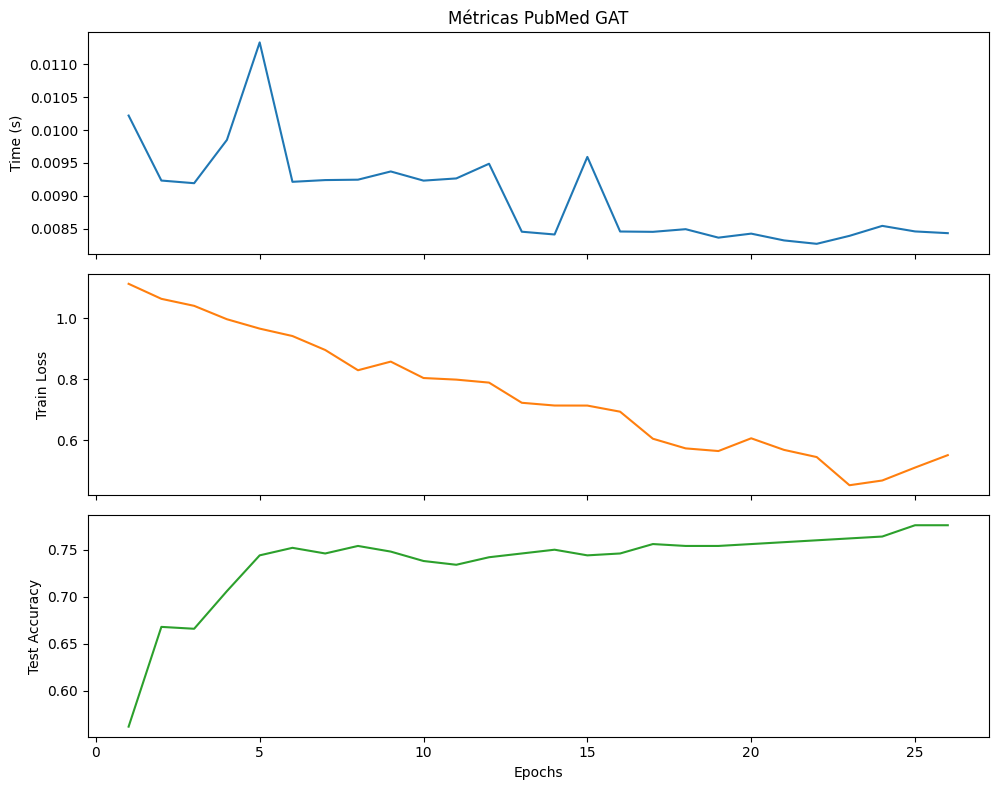

In [ ]:
T = list(range(1, len(pm_gat_time) + 1))

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(T, pm_gat_time, color="tab:blue")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Métricas PubMed GAT")

axes[1].plot(T, pm_gat_train_losses, color="tab:orange")
axes[1].set_ylabel("Train Loss")

axes[2].plot(T, pm_gat_test_acc, color="tab:green")
axes[2].set_ylabel("Test Accuracy")
axes[2].set_xlabel("Epochs")

plt.tight_layout()
plt.show()


En cuento al entrenamiento, este se ve desalborotado, con saltos discontinuos en la train loss por epoch y en el test accuracy. El epoch con la menor perdida fue el 22 con perdida de 0.4534 y validation accuracy de 0.7620. El grafo PubMed es conexo y generalmente más homogeneo que citeseer, por lo que a primera vista puede ser raro ver que el modelo GAT se acompleje en el entrenamiento. Una posible razón de este comportamiento puede ser como se relacionan los datos relativametne similares al dropout = 0.5 del modelo, lo que resultaria en un gran movimiento de parámetros en backpropagation.

Las metricas obtenidas por el modelo fueron excelentes, con el accuracy y el weighted accuracy cercano a 0.74 y con ningúna clase teniendo muchos peores resultados que las demás. Se nota además que la clase 0, a pesar de estar ligeramente infrarepresentado en el dataset logra tener el mayor f1-score. Estos comportamientos dan la noción de que el modelo está haciendo lo pensado al lograr discriminar entre relavancias de vecinos para otorgar resultados balanceados.

# Parte 4: Conclusiones generales GCN vs GAT (4 puntos)

Compare los resultados obtenidos en las partes 2 y 3. Presente sus conclusiones sobre la experimentación realizada.

**Tablas con Métricas:**

Metricas  GCN y GAT en Citeseer y PubMed

| Dataset   | Modelo | Accuracy | Macro Avg (Prec / Rec / F1) | Weighted Avg (Prec / Rec / F1) |
|-----------|--------|----------|-----------------------------|--------------------------------|
| Citeseer  | GCN    | 0.719    | 0.686 / 0.691 / 0.686      | 0.729 / 0.719 / 0.722          |
| Citeseer  | GAT    | 0.701    | 0.670 / 0.674 / 0.669      | 0.709 / 0.701 / 0.702          |
| PubMed    | GCN    | 0.796    | 0.794 / 0.789 / 0.791      | 0.796 / 0.796 / 0.796          |
| PubMed    | GAT    | 0.747    | 0.740 / 0.758 / 0.748      | 0.748 / 0.747 / 0.747          |

F1-score por clase (GCN vs GAT)

| Dataset   | Clase | GCN F1 | GAT F1 |
|-----------|-------|--------|--------|
| Citeseer  | 0     | 0.369  | 0.365  |
|           | 1     | 0.655  | 0.624  |
|           | 2     | 0.736  | 0.702  |
|           | 3     | 0.793  | 0.764  |
|           | 4     | 0.806  | 0.802  |
|           | 5     | 0.759  | 0.755  |
| PubMed    | 0     | 0.772  | 0.751  |
|           | 1     | 0.810  | 0.744  |
|           | 2     | 0.791  | 0.748  |


En cuanto al entrenamiento, en CGS las curvas de train loss y accuracy fueron más estables mientras que en GAT el entrenamiento fue más caótico. Notar sin embargo que GAT tiene heads y un dropout .3 más alto.

En el dataset Citeseer CGN fue ligeramente mejor que GAT, con un accuracy en testing de 71.9% vs 70.1% y teniendo ligeramente mejores metricas para todas las clases y en macro. Además, se puede ver que ambos modelos se vieron complicados en la clase 0, con rendimiento similar a f1 = 0.367.

En el segundo dataset, PubMed, CGN dio resultados bastamente mejores que GAT, con un accuracy de 79.6% vs 74.7%, con todas las metricas macro y por clases mejores.

Comparando, ambos modelos lograron un buen rendimiento en ambos datasets. Tanto GCN como GAT tuvieron mejor rendimiento en el dataset más homogeneo como es de esperar de GNN, y a pesar que GCN tuvo mejor rendimiento en ambos grafos, es importante destacar que GAT tuvo una ventaja comparativa en el grafo más heterogeneo Citeseer, lo que va de la mano con la teoría en que attention le permite al modelo discriminar entre vecinos. Es decir, los resultados apoyan la teória expuesta en la Parte 3 pregunta 3.1. que GAT puede ser mejor comparativamente en grafos heterogeneos y con ruido y CGN se comporta mejor en grafos homogeneos bien portados.

Se destaca además que, dado que los datasets no son particularmente grandes, el tiempo de computo no pudo ser comparado entre los modelos. Pero teorícamente, CGN es la opción menos cara computacionalmente.

Finalmente, puede ser que CGN haya obtenido mejores resultados en ambos datasets, pero GAT mostró buen desempeño, y se teoriza que son una mejor selección de hiperparámetros GAT puede volverse más competitivo.